In [1]:
#pip install keras


In [2]:
#pip install tensorflow
#pip install keras

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
len(X_train)


60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

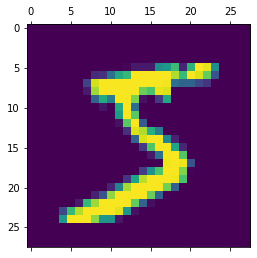

In [9]:
#plt.matshow(x_train[0])
#plt.matshow(x_train[1])
#plt.matshow(x_train[2])
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4738 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9262


In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9255


[0.2655946910381317, 0.9254999756813049]

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.5040274e-02, 4.5568379e-07, 6.2835738e-02, 9.6963626e-01,
       3.3249424e-03, 1.4238419e-01, 1.4313829e-06, 9.9983543e-01,
       1.3056797e-01, 7.0071042e-01], dtype=float32)

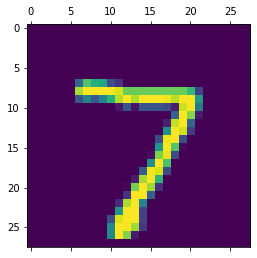

In [19]:
plt.matshow(X_test[0])

In [20]:
np.argmax(y_predicted[0])

7

In [30]:
np.argmax(y_predicted[1])

2

In [31]:
np.argmax(y_predicted[])

1

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   6,   10,  914,   16,    8,    5,   13,   11,   46,    3],
       [   3,    0,   17,  916,    0,   29,    2,   13,   24,    6],
       [   1,    1,    3,    2,  915,    0,   11,    4,   10,   35],
       [   7,    2,    2,   30,    8,  789,   15,    5,   28,    6],
       [  11,    3,    6,    1,    7,   15,  911,    2,    2,    0],
       [   1,    6,   20,    7,    7,    1,    0,  953,    4,   29],
       [   6,   11,    5,   18,    9,   30,    8,   13,  868,    6],
       [  11,    7,    1,   11,   29,    5,    0,   25,    6,  914]])>

Text(69.0, 0.5, 'Truth')

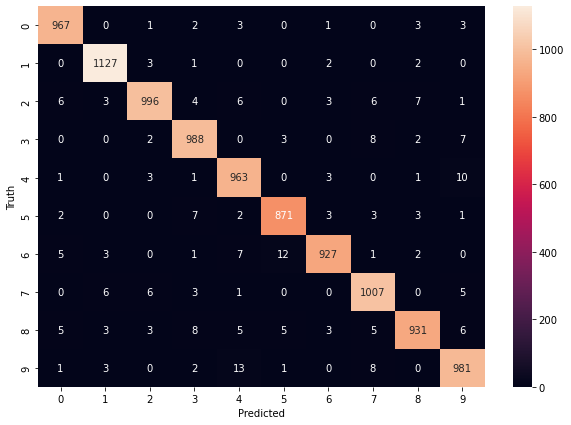

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2667 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1197 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0831 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0640 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0490 - accuracy: 0.9850


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9758


[0.07771562784910202, 0.9757999777793884]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

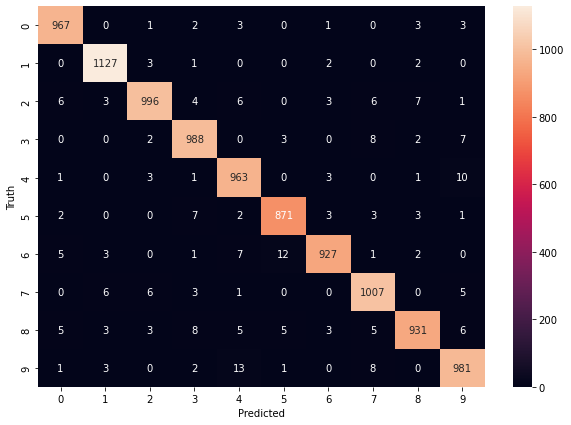

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2740 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1270 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0892 - accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0340 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9789


[0.07789399474859238, 0.9789000153541565]